# From Knime to Python

Notebook developed by: Jose Peris

Solved by [me](https://github.com/viasmo1)



# Scripting from Knime to python.
We used knime for fast prototyping and as a tool for a better concept undestanding



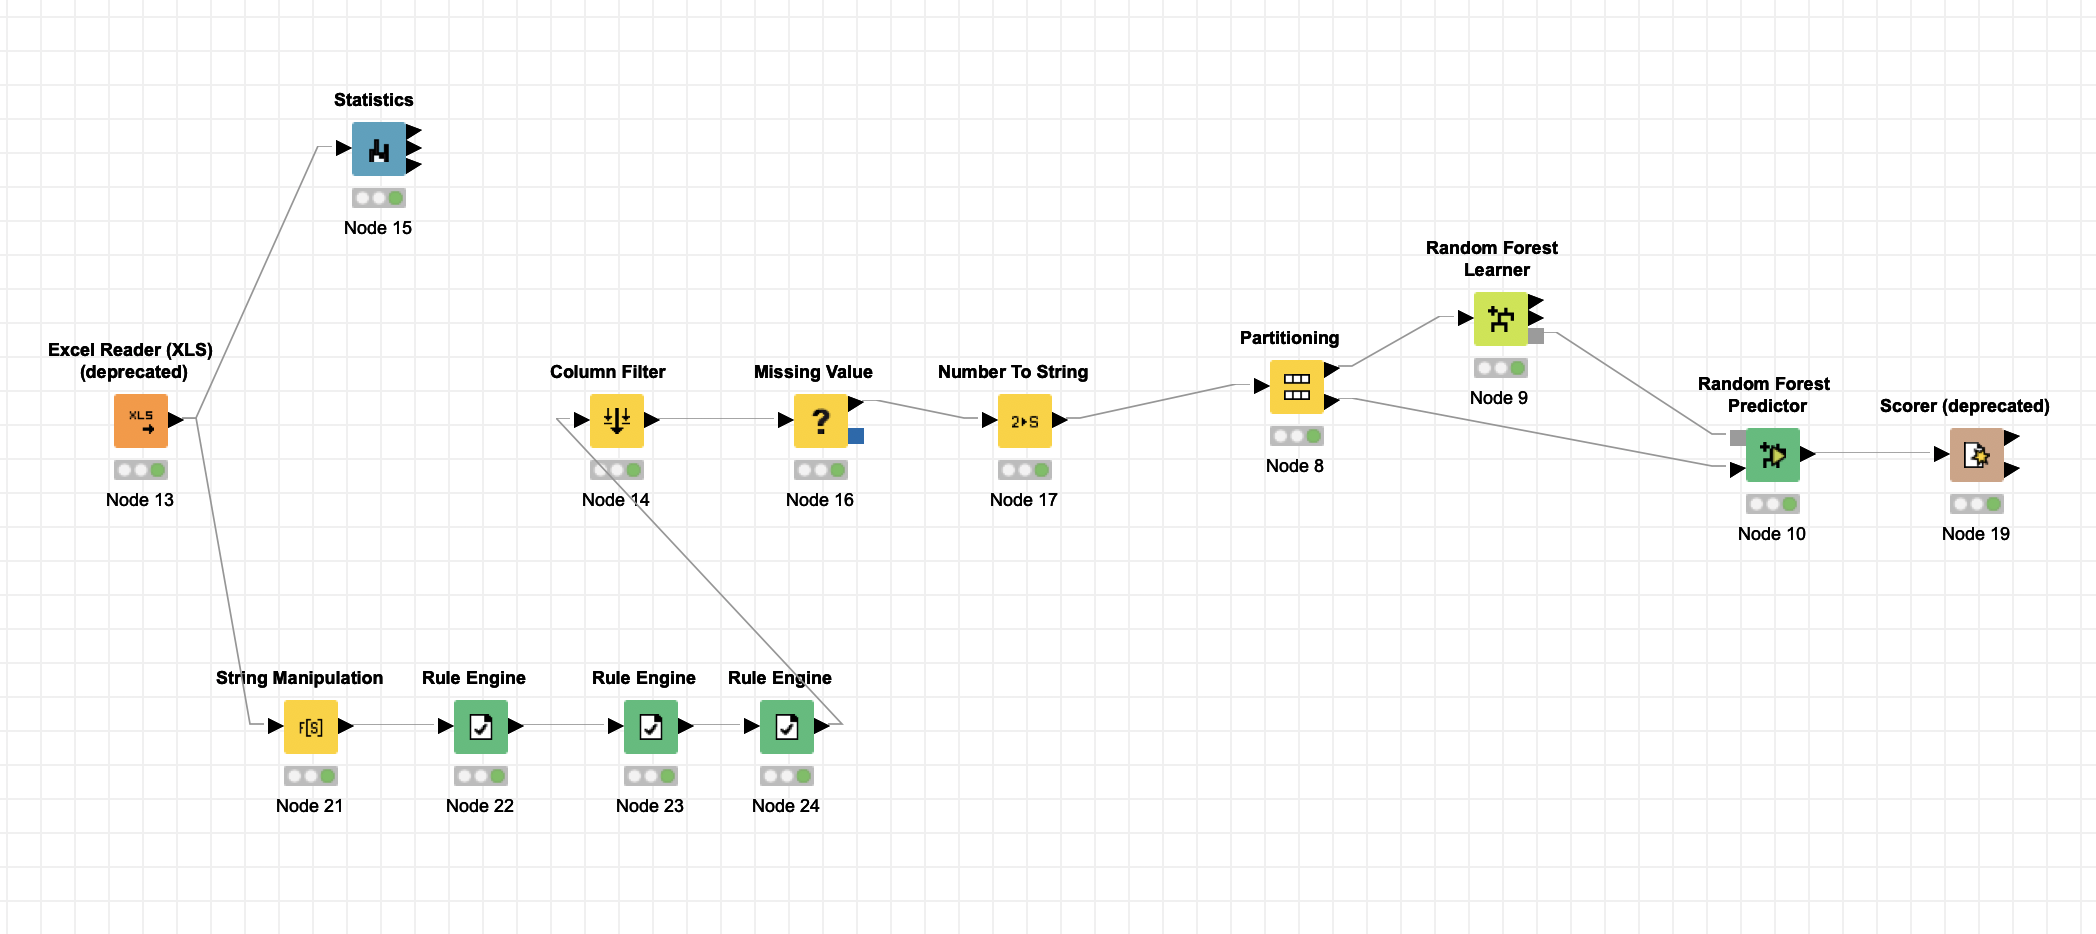

In [ ]:
# Let's start off by importing the relevant libraries
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Import training and test sets into the scripts
raw_training_df = pd.read_csv("/content/train.csv") # creates a Pandas data frame for training set
raw_test_df  = pd.read_csv("/content/test.csv") # similarly, creates a Pandas data frame for test set

# Let's start with the data exploration.
print, head and dtypes.


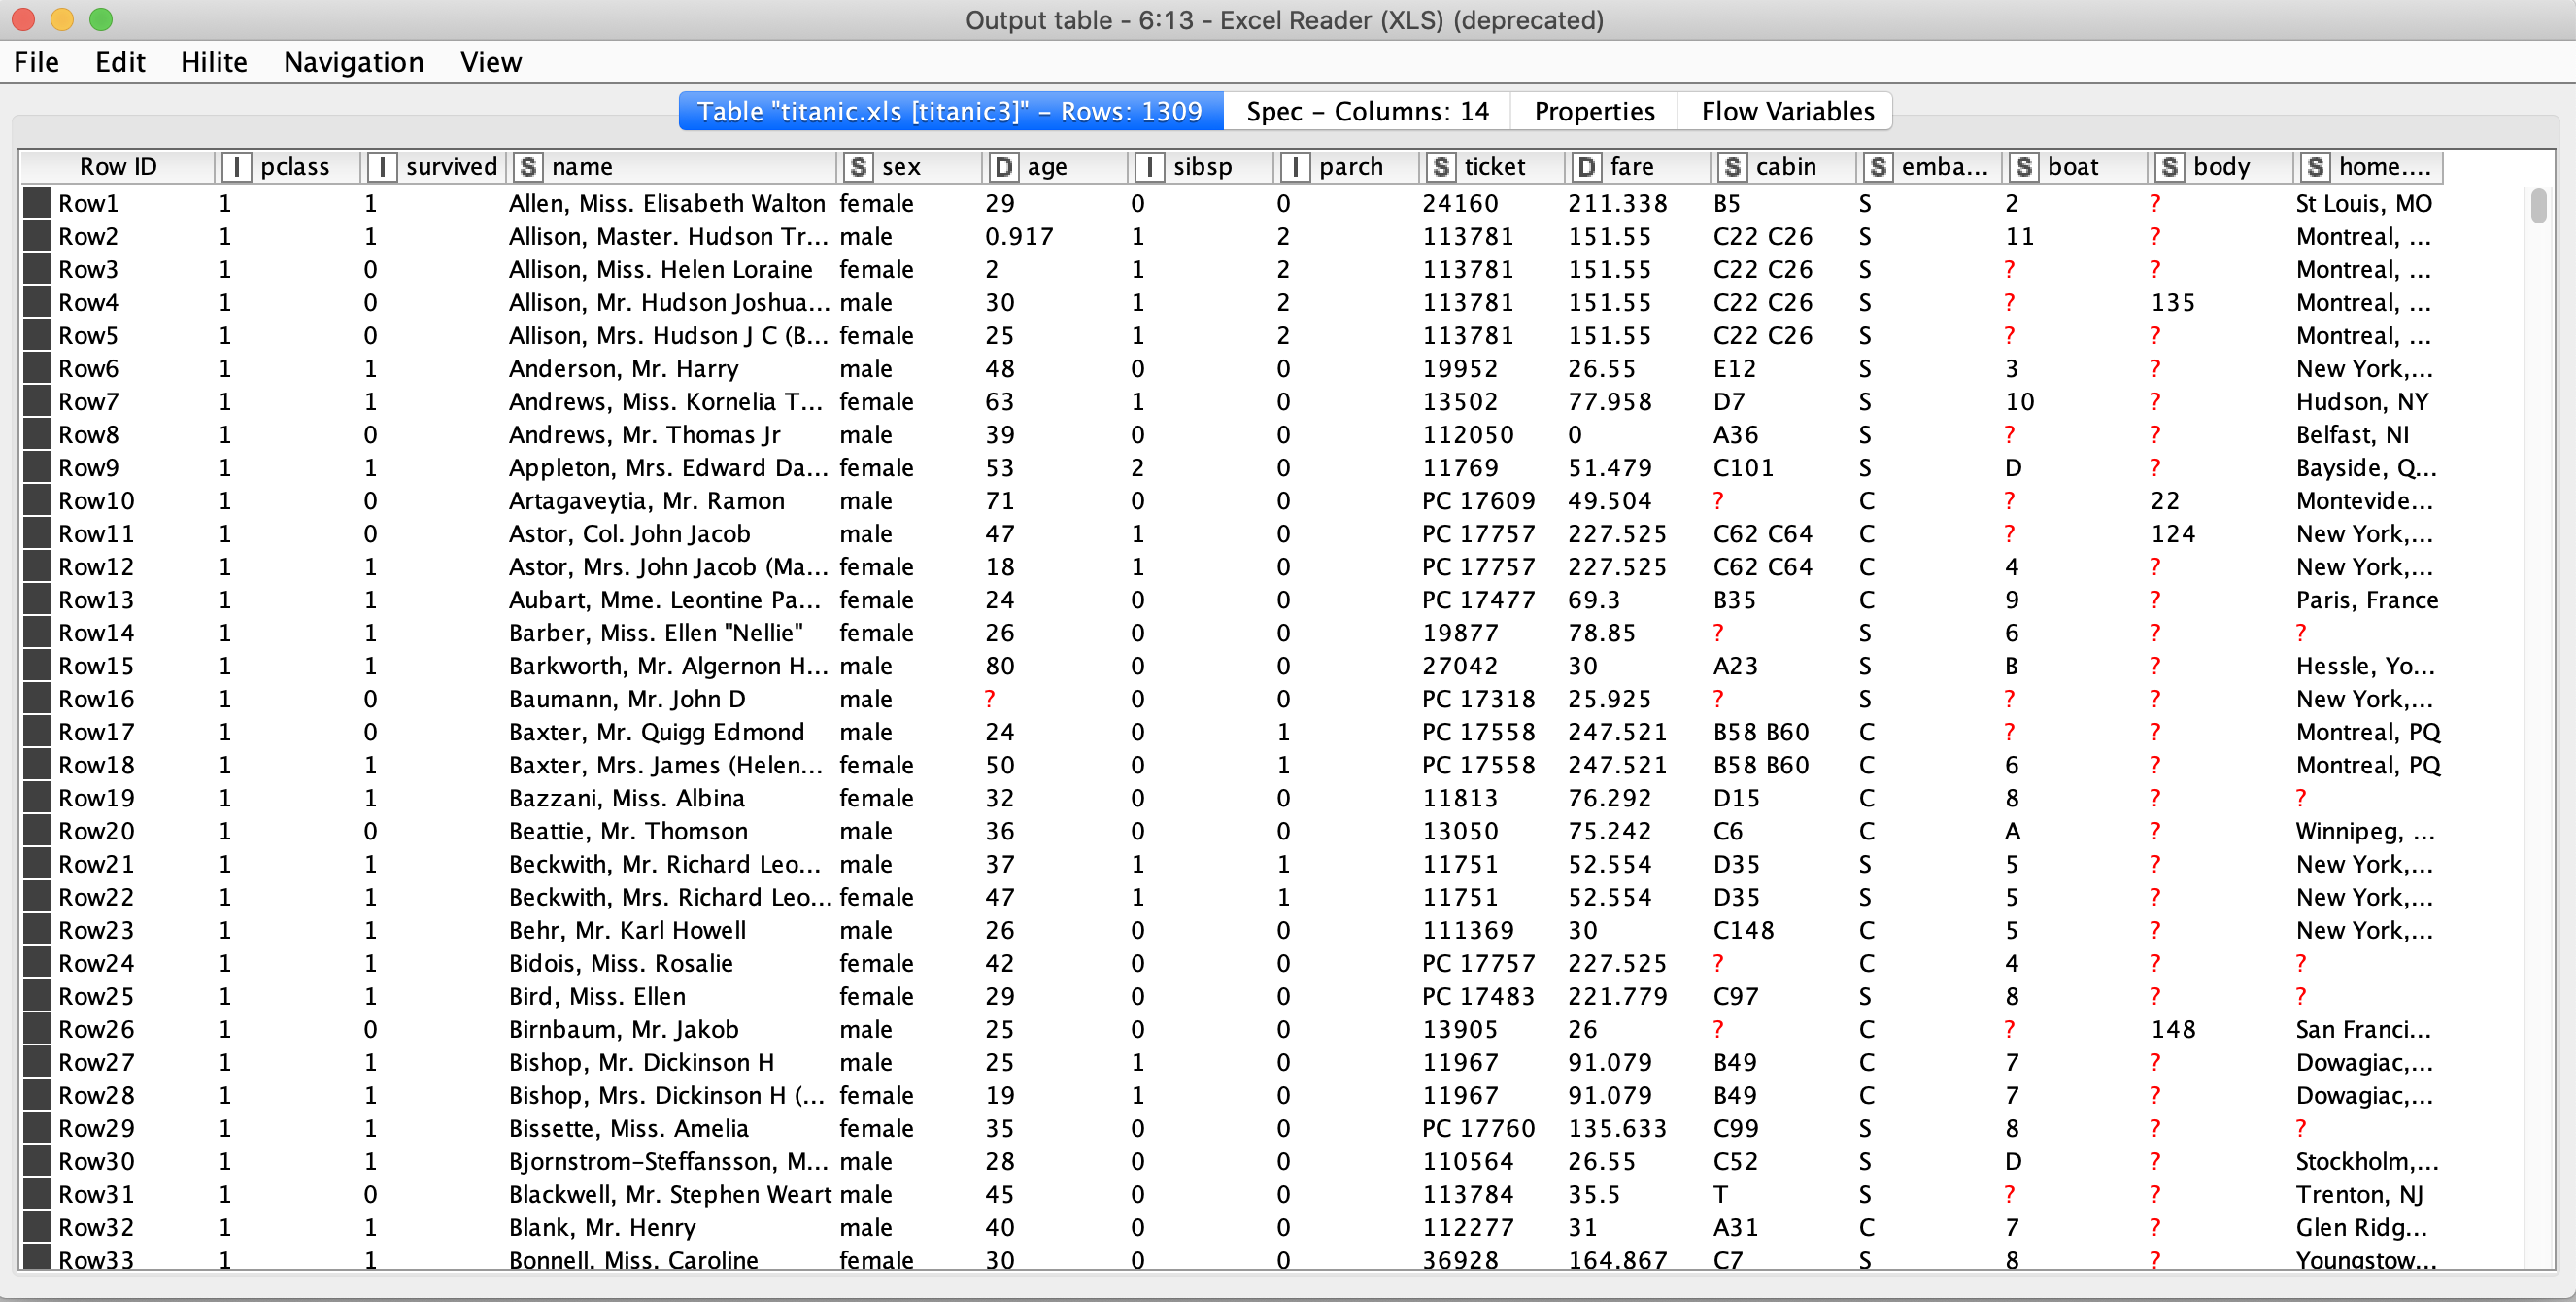

In [ ]:
print(raw_training_df) # Display training data (optional)
print(raw_test_df) # Display test data (optional)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

In [ ]:
raw_training_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
raw_test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
count_classes = pd.value_counts(raw_training_df['Survived'], sort = True).sort_index()

Once we imported the data into our script, it is crucial to briefly explore the data. You might have realised that this is an example of a supervised-learning and binary classification problem - we are required to classify the passengers listed in the test dataset into survivors (Survived = 1) and non-survivors (Survived = 0). Therefore, it necessary to check the skewness of the class labels in the training dataset.



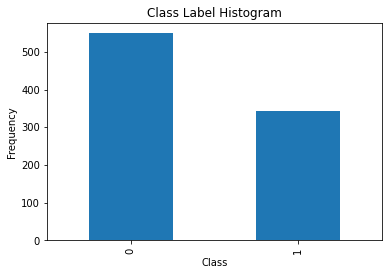

In [ ]:
# Plot a frequency histograms for the classes
count_classes = pd.value_counts(raw_training_df['Survived'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Class Label Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency");

From the histogram above it clear that the dataset contains more negative class labels (non-survivors) than positive (survivors) ones. However, it is not heavily imbalanced and thus we would not expect it to reduce the accuracy of our predictive model.


# Data Preprocessing
Our dataset contains a lot of information about each passenger. While some information, such as passenger age and their cabin location, may help determine a person's chances of survival, other information, such the passenger name and ticket details, would be futile. Thus, these can be considered as redundant feature labels that could potentially reduce the performance of our model. So, it would be wise to discard the information.

In [ ]:
# Remove the 'Name' and 'Ticket' columns from the dataframes 
training_df = raw_training_df.drop(['Name', 'Ticket'], axis=1)

In [ ]:
 print(training_df.columns) # List column names (Optional)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Use the mean 'Age' value for empty fields in the 'Age' column
training_df['Age'] = training_df['Age'].fillna(math.ceil(training_df['Age'].mean()))

In [ ]:
print (training_df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In order to feed in the data into a decision tree classifier, we need to convert strings into float data types (one to many)

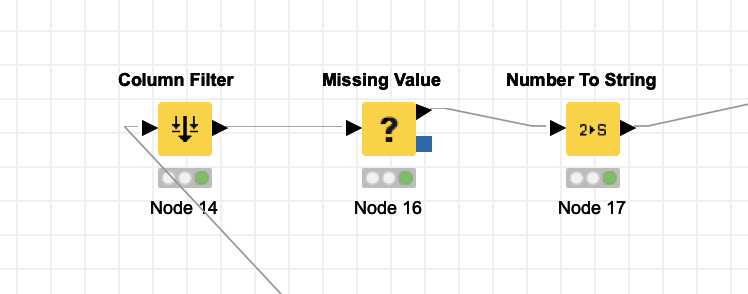

In [ ]:
def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[target_column] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets) # Returns modified dataframe and an array containing the different values encountered in a column

training_df, sex_targets = encode_target(training_df, "Sex")

training_df, embarked_targets = encode_target(training_df, "Embarked")

training_df, cabin_targets = encode_target(training_df, "Cabin")


In [ ]:
training_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

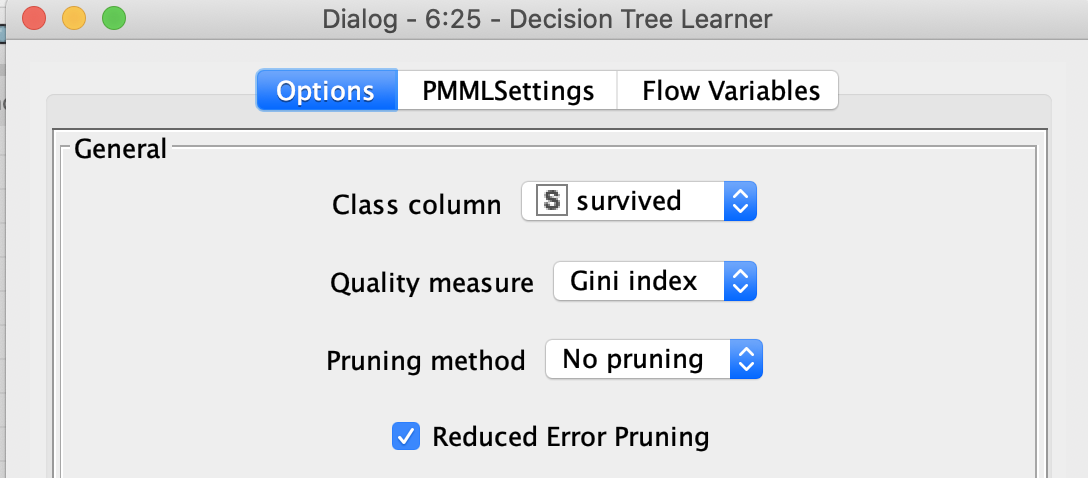

Use iloc: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [ ]:
# Assign class features to the variable 'X'
X = training_df.loc[:, training_df.columns != 'Survived']

In [ ]:
# Assign class labels to the variable 'y'
y = training_df.loc[:, training_df.columns == 'Survived']

Our test set does not specify which passenger survived and which passenger did not. In order to evaluate the performance of our classifier later, it is necessary to create a cross-validation set from the training dataset at this stage. Let's go with a 7:3 split - that is 70% of the training data will be used to train the classier and 30% for evaluating its accuracy. This is an important step as the classifier should not be tested on the data it has already been trained with.



In [ ]:
# Create a cross-validation (CV) set from the existing data set
X_train, X_CV, y_train, y_CV = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training and Evaluating the Classifier


In [ ]:
print(X_train)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
857          858       1    0  51.0      0      0  26.5500    143         0
52            53       1    1  49.0      1      0  76.7292     10         1
386          387       3    0   1.0      5      2  46.9000      0         0
124          125       1    0  54.0      0      1  77.2875     20         0
578          579       3    1  30.0      1      0  14.4583      0         1
..           ...     ...  ...   ...    ...    ...      ...    ...       ...
835          836       1    1  39.0      1      1  83.1583    140         1
192          193       3    1  19.0      1      0   7.8542      0         0
629          630       3    0  30.0      0      0   7.7333      0         2
559          560       3    1  36.0      1      0  17.4000      0         0
684          685       2    0  60.0      1      1  39.0000      0         0

[623 rows x 9 columns]


In [ ]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99) # Declare a decision tree clasifier

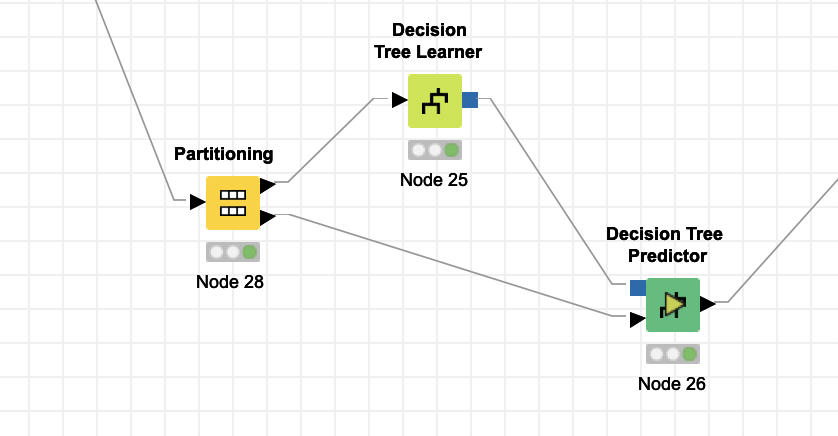

In [ ]:
dt.fit(X_train, y_train) # Fit the classifier to the training set
y_pred = dt.predict(X_CV) # Predict class labels for the cross-validation set

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_CV, y_pred)
np.set_printoptions(precision=2)

[[145  23]
 [ 34  66]]


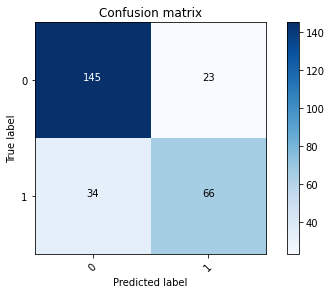

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                      title='Confusion matrix')
plt.show()


Evaluate your model
ROC , AUC, scores
![texto alternativo](https://drive.google.com/uc?id=1wPyRrV0s8EeK9GLPK8XliIlAYTTfFmUI)

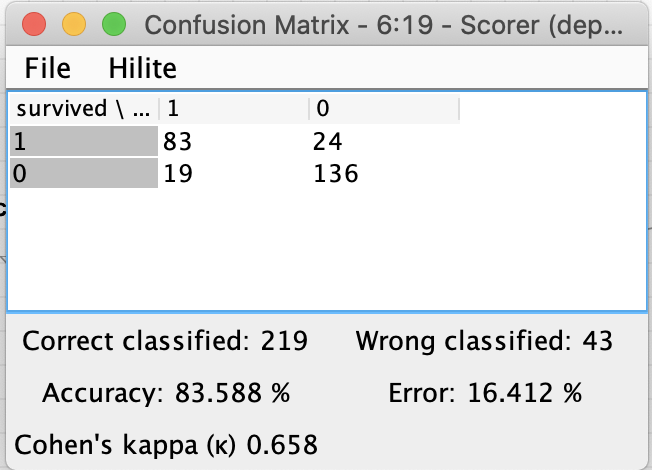

In [ ]:
prec = cnf_matrix[1,1] / (cnf_matrix[0,1] + cnf_matrix[1,1])
print("The precision of the ML model is ", round(prec, 3))

recl = cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1])
print("The recall of the ML model is ", round(recl, 3))

f1 = 2*((recl*prec)/(recl+prec))
print("The f1-score of the ML model is %f." % round(f1, 3))

acc = (cnf_matrix[1,1] + cnf_matrix[0,0]) / ((cnf_matrix[0,1] + cnf_matrix[1,1]) + cnf_matrix[0,0] + cnf_matrix[1,0])
print("The accuracy of the ML model is ", round(acc, 3))

The precision of the ML model is  0.742
The recall of the ML model is  0.66
The f1-score of the ML model is 0.698000.
The accuracy of the ML model is  0.787


The precision metric tells us what proportion of passengers we predicted as having survived actually had survived, while the recall gives the proportion of passengers that actually had survived were predicted by us as having survived. An f1-score combines these metrics to create a single value metric. For the current classifier, we have obtained an f1-score of 0.69 and this informs us that our classifier is flagging up true positives reasonably well. The high accuracy metric score of 0.79 indicates that our classifier is reasonably good at identifying true positives and true negatives. Since these metrics are equal to and greater than 0.70, we can go ahead and use this classier to make predictions for the original test dataset.